# Projection prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

## Loading the data

In [2]:
doe = pd.read_csv('../data/doe.csv')
doe

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.00,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
1,2,5,1.48,400,2.4,3,-4,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
2,3,1,1.00,210,2.4,3,-1,70,70.2,1.71,2.00,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
3,4,2,1.19,390,2.4,3,5,30,70.2,1.71,2.00,200.03813,DC01_1.20mm,160.714935,174.535075,564.455438,424.931018,490.442223
4,5,1,1.00,360,1.6,2,3,30,71.8,1.14,1.33,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,1.01,90,1.6,2,0,70,71.8,1.14,1.33,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
996,997,4,0.99,480,2.4,3,5,30,70.2,1.71,2.00,71.94184,AA5083_1.00mm,248.796491,251.315902,385.373316,371.774337,384.299873
997,998,5,1.48,490,2.4,3,3,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
998,999,5,1.48,120,2.4,3,-3,30,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834


In [3]:
data = pd.read_csv('../data/projection.csv')
data.drop(data[data.doe_id == 1000].index, inplace=True)
data.drop(data[data.doe_id == 247].index, inplace=True)
data

,doe_id,nid,x,y,z,deviation,xp,yp,zt,thickness,epseqpl
0,1,1,178.844904,12.096795,-33.0000,-0.422629,171.242500,81.12756,-53.0000,0.974652,0.054724
1,1,2,0.000004,42.424225,-33.0000,-0.204964,-14.477250,75.39872,-53.0000,0.971030,0.071798
2,1,3,0.000004,37.424225,-28.0000,-0.202234,-13.429390,67.66225,-48.0000,0.934250,0.115493
3,1,4,177.490304,7.273645,-28.0000,-0.335761,170.959500,73.34183,-48.0000,0.947184,0.098121
4,1,5,193.068604,62.741605,-33.0000,-0.980137,173.356600,133.80950,-53.0000,0.999883,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10620715,999,181829,2.003804,-37.761925,-29.2934,0.301891,9.278828,-93.38924,-49.2934,1.481663,0.075776
10620716,999,181830,2.002079,-38.264335,-30.4967,0.508124,9.417444,-94.67548,-50.4967,1.482753,0.075654
10620717,999,181831,1.999373,-39.057515,-31.5316,-0.766134,9.560166,-95.96204,-51.5316,1.482687,0.078600
10620718,999,181832,1.995830,-40.090815,-32.3267,-0.880658,9.706806,-97.24890,-52.3267,1.481748,0.076287


In [4]:
from cut_predictor import ProjectionPredictor

reg = ProjectionPredictor()
reg.load_data(
    doe = doe,
    data = data,
    index='doe_id',
    process_parameters = [
        'Blechdicke', 
        'Niederhalterkraft', 
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe',
        'Stempel_ID',
    ],
    categorical = [
        'Ziehspalt', 
        'Ziehtiefe',
        'Stempel_ID',
    ],
    position = ['xp', 'yp'],
    output = ['deviation', 'thickness']
)

In [5]:
reg.data_summary()

Data summary
------------------------------------------------------------

Process parameters:
	- Blechdicke : numerical [ 0.99  ...  1.48 ]
	- Niederhalterkraft : numerical [ 10  ...  500 ]
	- Ziehspalt : categorical [1.6, 2.4]
	- Einlegeposition : numerical [ -5  ...  5 ]
	- Ziehtiefe : categorical [30, 50, 70]
	- Stempel_ID : categorical [2, 3]
Input variables:
	- xp : numerical, [ -22.66964 / 173.3566 ] 
	- yp : numerical, [ -152.0864 / 137.1274 ] 
Output variable(s):
	- deviation : numerical, [ -26.854551193715 / 6.331377221700899 ]
	- thickness : numerical, [ 0.8450137 / 1.6982 ]

Inputs
------------------------------------------------------------

(10608651, 12)

Outputs
------------------------------------------------------------

(10608651, 2)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                         

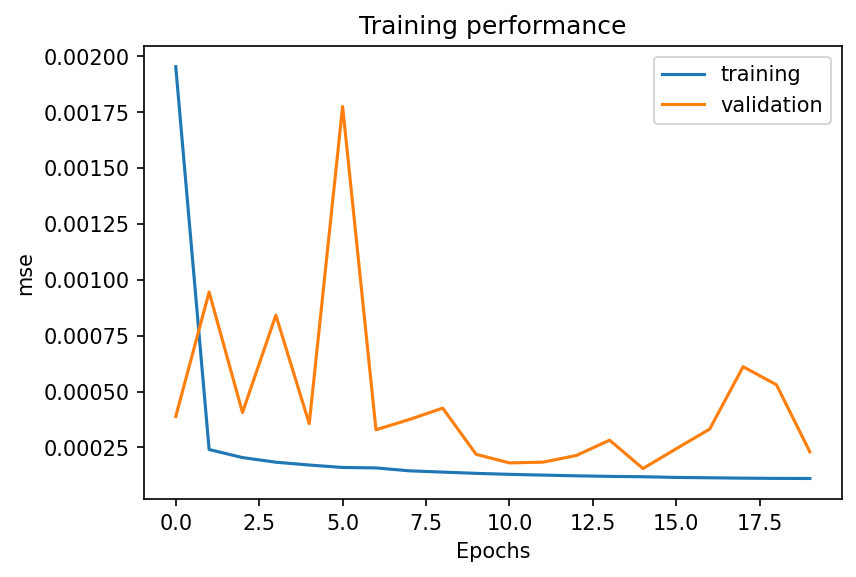

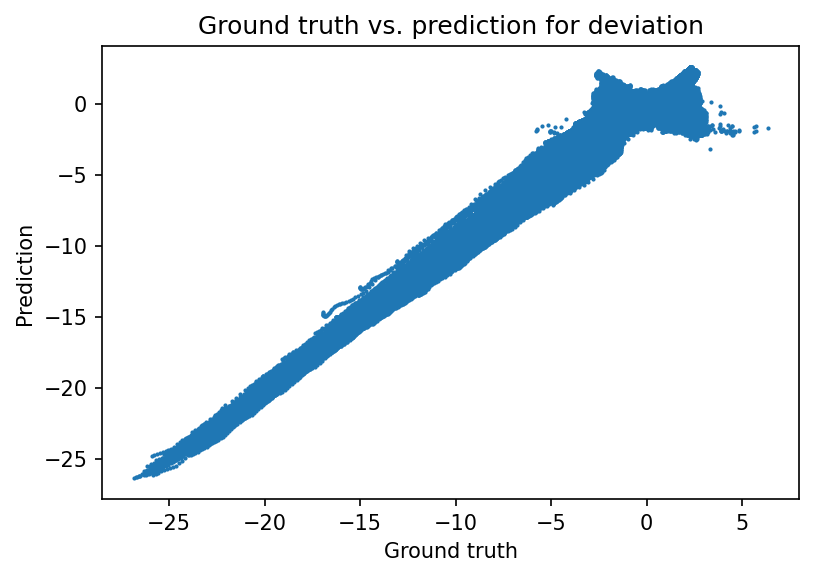

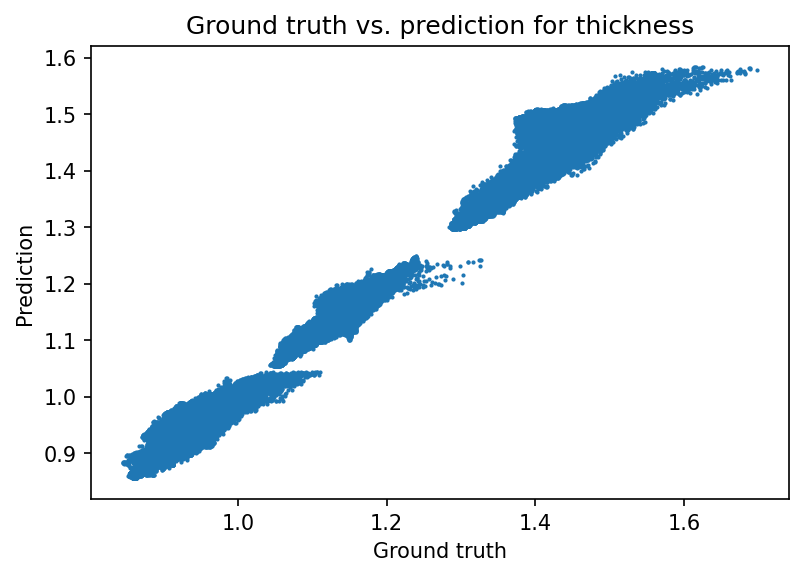

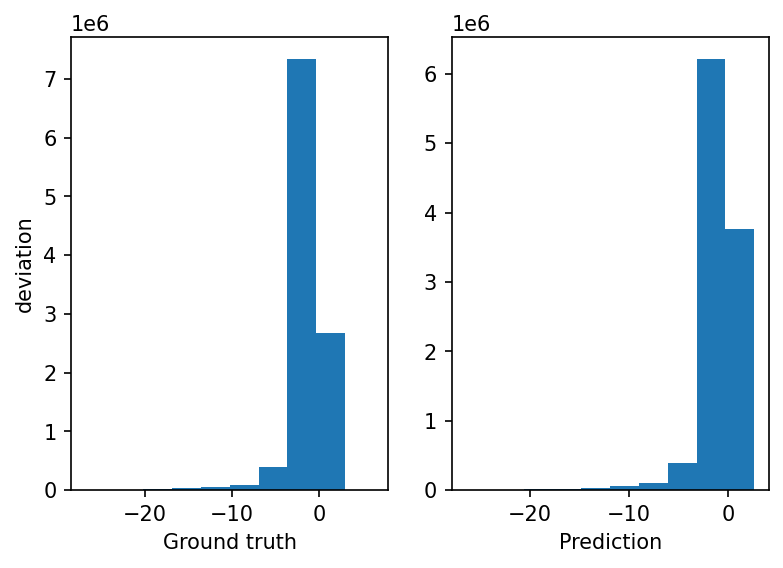

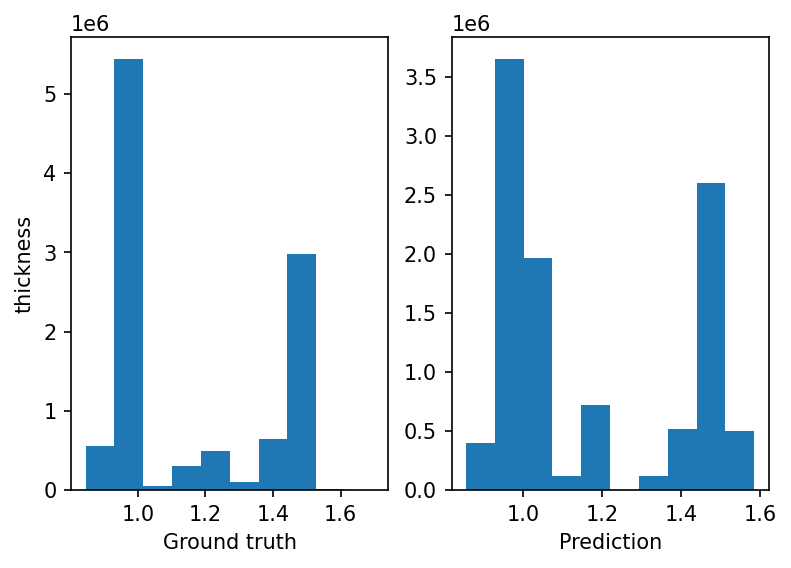

In [6]:
config = {
    'batch_size': 4096,
    'max_epochs': 20,
    'layers': [128, 128, 128, 128, 128],
    'dropout': 0.0,
    'learning_rate': 0.0005
}

reg.custom_model(save_path='best_projection_model', config=config, verbose=True)
reg.training_summary()

In [6]:
reg.load_network('best_projection_model')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



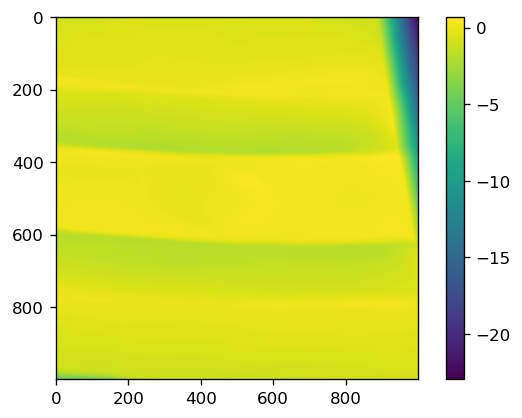

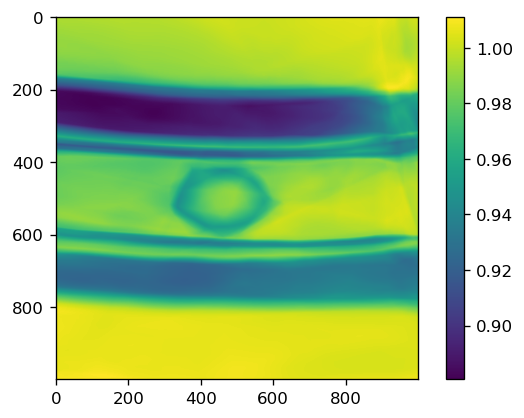

In [7]:
x, y = reg.predict({
        'Blechdicke': 1.01, 
        'Niederhalterkraft': 410.0, 
        'Ziehspalt': 2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 30,
        'Stempel_ID': 3,
        'E': 191.37245,
        'Rp0': 138.22696,
        'Rp50': 449.528189,
    }, 
    shape=(1000, 1000))

plt.figure()
plt.imshow(y[0, :, :].T)
plt.colorbar()
plt.figure()
plt.imshow(y[1, :, :].T)
plt.colorbar()

Doe_ID 6


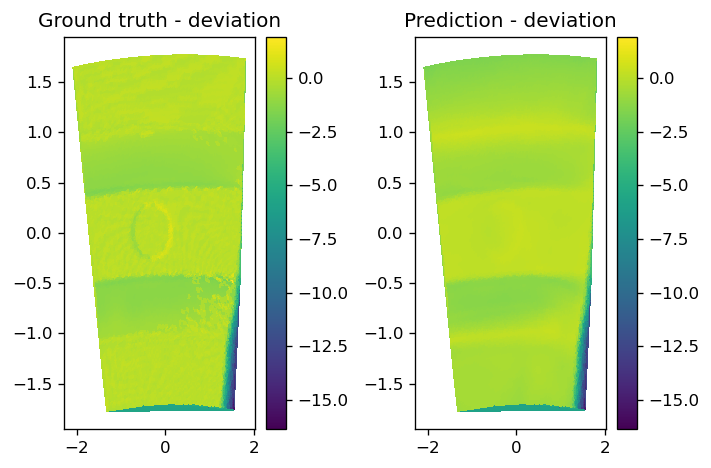

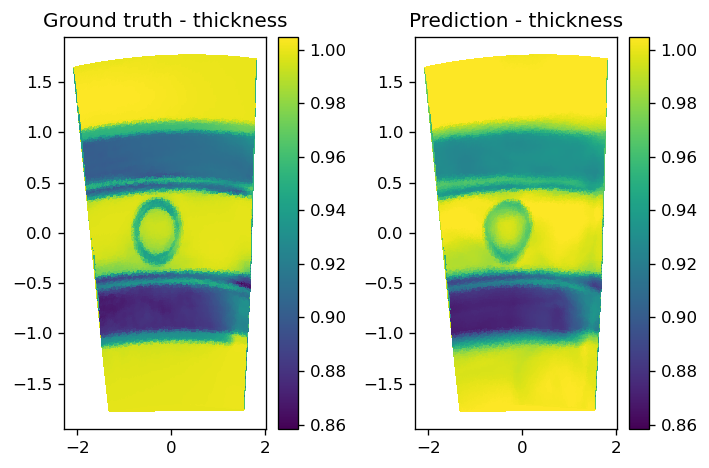

In [8]:
idx = np.random.choice(999) + 1
print("Doe_ID", idx)
reg.compare(idx)